In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.insert(1, '../src/')
from config import raw_data_path, univariate_data_path, processed_data_path, models_path

/home/nwertheim/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/scratch-local/nwertheim.11778840/ipykernel_3960037/586939057.py:8: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


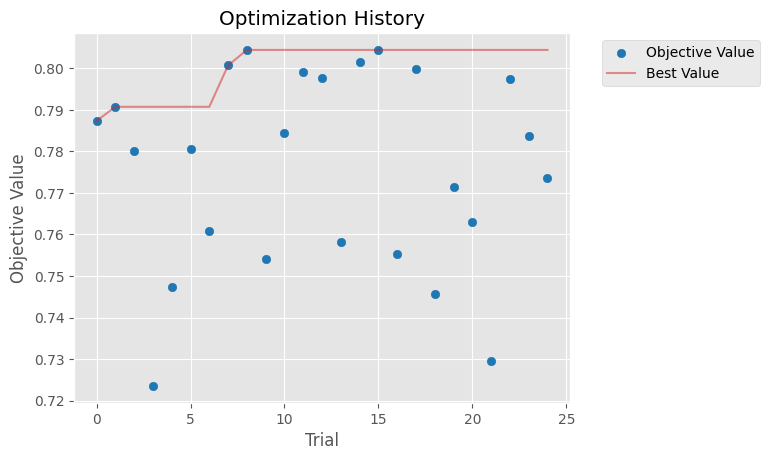

/scratch-local/nwertheim.11778840/ipykernel_3960037/586939057.py:14: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


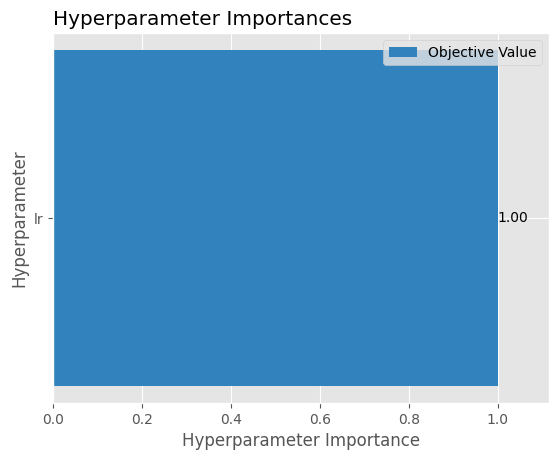

/scratch-local/nwertheim.11778840/ipykernel_3960037/586939057.py:20: ExperimentalWarning: plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_parallel_coordinate(study)


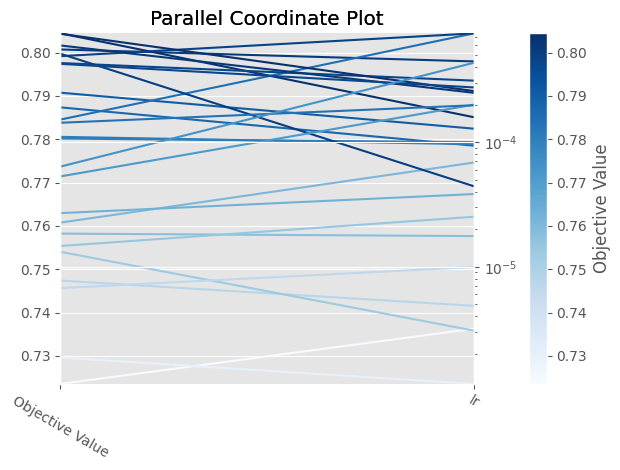

In [2]:
import optuna
import joblib  # or use pickle
path = os.path.join(models_path,  "FCMAE_ResNet_optuna_ADAM.pkl")
# Load the study
study = joblib.load(path)

# Plot: Optimization History
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.title("Optimization History")
# plt.tight_layout()
plt.show()

# Plot: Hyperparameter Importance
optuna.visualization.matplotlib.plot_param_importances(study)
# plt.title("Hyperparameter Importance")
# plt.tight_layout()
plt.show()

# Plot: Parallel Coordinates (shows interaction between parameters)
optuna.visualization.matplotlib.plot_parallel_coordinate(study)
plt.title("Parallel Coordinate Plot")
plt.tight_layout()
plt.show()

In [3]:
import os
import joblib
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances, plot_parallel_coordinate
import matplotlib.pyplot as plt






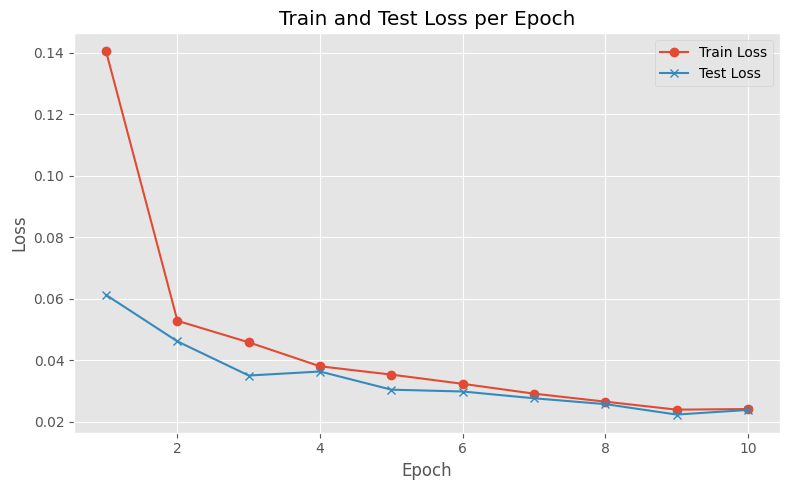

In [4]:
train_losses = [0.1404, 0.0528, 0.0458, 0.0380, 0.0353, 0.0323, 0.0291, 0.0265, 0.0239, 0.0241]
test_losses  = [0.0612, 0.0461, 0.0350, 0.0363, 0.0304, 0.0298, 0.0276, 0.0257, 0.0223, 0.0238]
num_epochs = 10
# Plotting after training
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss", marker='o')
plt.plot(range(1, num_epochs + 1), test_losses, label="Test Loss", marker='x')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train and Test Loss per Epoch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Function to parse the data from the file
def parse_optuna_results(file_path):
    data = []
    with open(file_path, "r") as file:
        for line in file:
            # Use regex to extract the trial information
            match = re.match(
                r"Trial (\d+): learning_rate=(\S+), batch_size=(\d+), masking_ratio=(\S+), num_layers=(\d+), hidden_dim=(\d+), validation_loss=(\S+)", line)
            if match:
                trial, learning_rate, batch_size, masking_ratio, num_layers, hidden_dim, validation_loss = match.groups()
                # Append parsed data as a dictionary
                data.append({
                    "trial": int(trial),
                    "learning_rate": float(learning_rate),
                    "batch_size": int(batch_size),
                    "masking_ratio": float(masking_ratio),
                    "num_layers": int(num_layers),
                    "hidden_dim": int(hidden_dim),
                    "validation_loss": float(validation_loss)
                })
    return data

# Path to your optuna results file
file_path = "optuna_results.txt"

# Parse the results from the file
data = parse_optuna_results(file_path)

# Create DataFrame
df = pd.DataFrame(data)

# Plot Optimization History (Validation Loss vs. Trial Number)
plt.figure(figsize=(10, 6))
plt.plot(df["trial"], df["validation_loss"], marker='o', linestyle='-', color='b')
plt.xlabel("Trial")
plt.ylabel("Validation Loss")
plt.title("LSTM Autoencoder Optimization History")
plt.grid(True)
plt.show()

# Plot the distribution of hyperparameters
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Learning Rate distribution
sns.histplot(df["learning_rate"], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Learning Rate Distribution")

# Plot Batch Size distribution
sns.histplot(df["batch_size"], kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Batch Size Distribution")

# Plot Masking Ratio distribution
sns.histplot(df["masking_ratio"], kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Masking Ratio Distribution")

# Plot Num Layers distribution
sns.histplot(df["num_layers"], kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Num Layers Distribution")

plt.tight_layout()
plt.show()

# You can also use seaborn to visualize hyperparameter importance with pairplot
sns.pairplot(df[["learning_rate", "batch_size", "masking_ratio", "num_layers", "validation_loss"]])
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'optuna_results.txt'

In [ ]:
# # Load the preprocessed dataset
# save_path = os.path.join(processed_data_path, 'target_preprocessed.npy')
# target_preprocessed = np.load(save_path, allow_pickle=True)

# # Extract the first instance
# first_instance = target_preprocessed[16]
# print(first_instance)
# signal = first_instance['signal']
# record_name = first_instance['record_name']
# # Create a figure with 6 subplots
# fig, axes = plt.subplots(6, 1, figsize=(12, 10), sharex=True)
# fig.suptitle(f"Signal Data for {record_name}")

# # Plot each channel in a separate subplot
# time_axis = np.arange(signal.shape[0])   # Time in seconds
# for i in range(6):
#     axes[i].plot(time_axis, signal[:, i], label=f'Channel {i+1}')
#     axes[i].set_ylabel("Amplitude")
#     axes[i].legend()

# axes[-1].set_xlabel("Time (seconds)")

# plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
# plt.show()

In [ ]:
# # Load the preprocessed dataset
# save_path = os.path.join(raw_data_path, 'target_data.npy')
# target_preprocessed = np.load(save_path, allow_pickle=True)

# # Extract the first instance
# first_instance = target_preprocessed[11]
# print(first_instance)
# signal = first_instance['signal']
# record_name = first_instance['record_name']

# # Create a figure with 6 subplots
# fig, axes = plt.subplots(6, 1, figsize=(12, 10), sharex=True)
# fig.suptitle(f"Signal Data for {record_name}")

# # Plot each channel in a separate subplot
# time_axis = np.arange(signal.shape[0])   # Time in seconds
# for i in range(6):
#     axes[i].plot(time_axis, signal[:, i], label=f'Channel {i+1}')
#     axes[i].set_ylabel("Amplitude")
#     axes[i].legend()

# axes[-1].set_xlabel("Time (seconds)")

# plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
# plt.show()

In [ ]:
# # Load the preprocessed dataset
# save_path = os.path.join(processed_data_path, 'trimmed_target.npy')
# target_preprocessed = np.load(save_path, allow_pickle=True)

# # Extract the first instance
# first_instance = target_preprocessed[6]
# print(first_instance)
# signal = first_instance['signal']
# # Create a figure with 6 subplots
# fig, axes = plt.subplots(6, 1, figsize=(12, 10), sharex=True)
# fig.suptitle(f"Signal Data for {record_name}")

# # Plot each channel in a separate subplot
# time_axis = np.arange(signal.shape[0])   # Time in seconds
# for i in range(6):
#     axes[i].plot(time_axis, signal[:, i], label=f'Channel {i+1}')
#     axes[i].set_ylabel("Amplitude")
#     axes[i].legend()

# axes[-1].set_xlabel("Time (seconds)")

# plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
# plt.show()